# Table of Content

- [Data Import](#Data-Import)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Modeling](#Modeling)

## Data Import

In [66]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data/large_train_sample.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  wage            32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [19]:
# encoding the target column
df['target'] = df.wage.map(lambda x: 1 if x==' >50K' else 0)

In [83]:
df.select_dtypes('object').columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'sex', 'native-country', 'wage'],
      dtype='object')

In [86]:
df_dum = pd.get_dummies(df,columns=df.select_dtypes('object').columns,drop_first=True)

## Exploratory Data Analysis

In [23]:
corr = df.corr()

<AxesSubplot:>

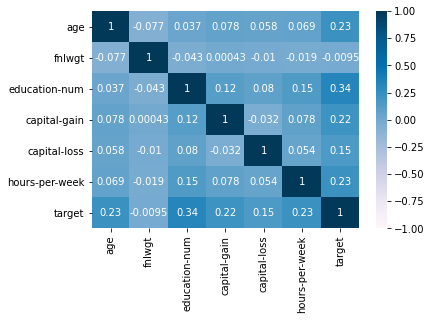

In [43]:
sns.heatmap(corr,cmap='PuBu',vmin=-1,vmax=1,annot=True)

In [31]:
# Baseline score
df[['target']].value_counts(normalize=True)

target
0         0.75919
1         0.24081
dtype: float64

## Modeling

(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

In [73]:
X = df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,stratify=y)

In [47]:
model_params = {}
count = 0

In [80]:
t0 = time.time()

pipe = Pipeline([
    ('rf', RandomForestClassifier())
    
])

pipe_params = {
    'rf__n_estimators':[5, 20, 50,100],
    'rf__criterion':['gini'],
    'rf__max_depth':[None],
    'rf__min_samples_split':[2],
    'rf__min_samples_leaf':[1],
    'rf__min_weight_fraction_leaf':[0.0],
    'rf__max_features':['auto'],
    'rf__max_leaf_nodes':[None],
    'rf__min_impurity_decrease':[0.0],
    'rf__min_impurity_split':[None],
    'rf__bootstrap':[True],
    'rf__oob_score':[False],
    'rf__n_jobs':[None],
    'rf__random_state':[None],
    'rf__verbose':[0],
    'rf__warm_start':[False],
    'rf__class_weight':[None],
    'rf__ccp_alpha':[0.001],
    'rf__max_samples':[None]
}

gs = GridSearchCV(pipe, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5, # 5-fold cross-validation.
                  n_jobs=4,
                  verbose = 2)

gs.fit(X_train, y_train)

count += 1

gs.best_params_['score'] = gs.best_score_
model_params[f'model_{count}'] = gs.best_params_
print(f'Run time: {time.time()-t0}')
model_df = pd.DataFrame.from_dict(model_params,orient='index')
model_df

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    9.5s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:   20.0s finished


Run time: 22.409046173095703


,score,rf__bootstrap,rf__ccp_alpha,rf__class_weight,rf__criterion,rf__max_depth,rf__max_features,rf__max_leaf_nodes,rf__max_samples,rf__min_impurity_decrease,rf__min_impurity_split,rf__min_samples_leaf,rf__min_samples_split,rf__min_weight_fraction_leaf,rf__n_estimators,rf__n_jobs,rf__oob_score,rf__random_state,rf__verbose,rf__warm_start
model_1,0.808763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_2,0.806716,True,0.000,NaN,gini,NaN,auto,NaN,NaN,0.0,NaN,1.0,2.0,0.0,100.0,NaN,False,NaN,0.0,False
model_3,0.805979,True,0.000,NaN,gini,NaN,auto,NaN,NaN,0.0,NaN,1.0,2.0,0.0,100.0,NaN,False,NaN,0.0,False
model_4,0.831532,True,0.001,NaN,gini,NaN,auto,NaN,NaN,0.0,NaN,1.0,2.0,0.0,100.0,NaN,False,NaN,0.0,False
model_5,0.832105,True,0.001,NaN,gini,NaN,auto,NaN,NaN,0.0,NaN,1.0,2.0,0.0,100.0,NaN,False,NaN,0.0,False
model_6,0.831695,True,0.001,NaN,gini,NaN,auto,NaN,NaN,0.0,NaN,1.0,2.0,0.0,50.0,NaN,False,NaN,0.0,False
model_7,0.831900,True,0.001,NaN,gini,NaN,auto,NaN,NaN,0.0,NaN,1.0,2.0,0.0,50.0,NaN,False,NaN,0.0,False


In [75]:
print(f'Random Forest Classifier Training Accuracy: {gs.score(X_train, y_train)}\n')
print(f'Random Forest Classifier Testing Accuracy: {gs.score(X_test, y_test)}\n')

Random Forest Classifier Training Accuracy: 0.9988533988533989

Random Forest Classifier Testing Accuracy: 0.8040781230807026



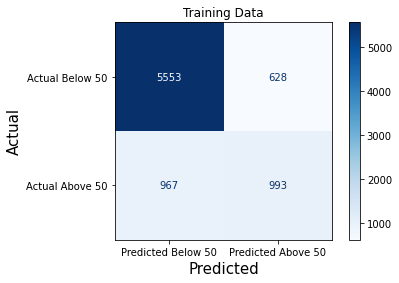

In [76]:
preds = gs.predict(X_test)

# save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

# Show the confusion matrix for the model

plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', values_format='d')
plt.title('Training Data')
plt.xlabel('Predicted',size=15)
plt.ylabel('Actual',size=15)
plt.xticks(ticks=[0,1],labels=['Predicted Below 50', 'Predicted Above 50'])
plt.yticks(ticks=[0,1],labels=['Actual Below 50', 'Actual Above 50'])
#plt.savefig('images/'+name+'.png',format='png')
plt.show();